In [32]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [33]:
# Read in data into dataframes 
train_features = pd.read_csv('data/training_features2.csv')
test_features = pd.read_csv('data/testing_features2.csv')
train_labels = pd.read_csv('data/training_labels2.csv')
test_labels = pd.read_csv('data/testing_labels2.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (445, 657)
Testing Feature Size:   (191, 657)
Training Labels Size:   (445, 1)
Testing Labels Size:    (191, 1)


In [34]:
train_features.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,...,sqrt_5Y Net Income Growth (per Share),log_5Y Net Income Growth (per Share),sqrt_3Y Net Income Growth (per Share),log_3Y Net Income Growth (per Share),sqrt_10Y Shareholders Equity Growth (per Share),log_10Y Shareholders Equity Growth (per Share),sqrt_5Y Shareholders Equity Growth (per Share),log_5Y Shareholders Equity Growth (per Share),sqrt_3Y Shareholders Equity Growth (per Share),log_3Y Shareholders Equity Growth (per Share),sqrt_10Y Dividend per Share Growth (per Share),log_10Y Dividend per Share Growth (per Share),sqrt_5Y Dividend per Share Growth (per Share),log_5Y Dividend per Share Growth (per Share),sqrt_3Y Dividend per Share Growth (per Share),log_3Y Dividend per Share Growth (per Share),sqrt_Receivables growth,log_Receivables growth,sqrt_Inventory Growth,log_Inventory Growth,sqrt_Asset Growth,log_Asset Growth,sqrt_Book Value per Share Growth,log_Book Value per Share Growth,sqrt_Debt Growth,log_Debt Growth,sqrt_R&D Expense Growth,log_R&D Expense Growth,sqrt_SG&A Expenses Growth,log_SG&A Expenses Growth
0,2.277880e+08,0.2972,5.087400e+07,1.769140e+08,30754000.0,1.759960e+08,2.067500e+08,-2.983600e+07,4000.0,-2.764200e+07,162000.0,-62000.0,0.0,-27804000.0,0.0,-27804000.0,-0.52,-0.52,54644937.0,53912000.0,0.00,0.7767,-0.023,-0.1213,-0.122,0.0184,-5.302000e+06,-2.763800e+07,-27866000.0,-0.1213,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.365513,-2.012905,NaN,NaN,NaN,NaN,0.000000,NaN,0.457930,-1.562077,0.000000,NaN,0.267769,-2.635265,NaN,NaN,0.000000,NaN,0.536843,-1.244101,0.500400,-1.384696
1,1.155457e+09,0.3659,3.860300e+08,7.694270e+08,313777000.0,7.360580e+08,1.049835e+09,-2.804080e+08,0.0,-2.897140e+08,7447000.0,0.0,0.0,-297161000.0,0.0,-297161000.0,-1.81,-1.81,170679363.0,164091302.0,0.00,0.6659,-0.207,-0.2507,-0.257,0.0261,-2.394120e+08,-2.897140e+08,-297161000.0,-0.2507,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.666333,-0.811931,0.000000,NaN,1.080370,0.154608,0.420357,-1.733302,0.000000,NaN,0.295296,-2.439551,0.522207,-1.299383
2,4.068100e+07,0.0911,2.544500e+07,1.523600e+07,823000.0,1.406900e+07,1.507400e+07,1.620000e+05,180000.0,1.520000e+05,-1608000.0,-170000.0,0.0,1760000.0,0.0,1760000.0,0.10,0.10,17317611.0,17161825.0,0.00,0.3745,0.039,0.0082,0.043,-0.0046,1.589000e+06,3.320000e+05,1590000.0,0.0037,...,0.000000,NaN,0.000000,NaN,1.087382,0.167546,0.335559,-2.183914,0.334664,-2.189256,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.343948,-2.134532,NaN,NaN,0.289310,-2.480516,0.302324,-2.392510,0.242074,-2.837021,NaN,NaN,0.201990,-3.199073
3,5.741800e+07,-0.0576,3.904500e+07,1.837300e+07,0.0,1.584600e+07,1.652100e+07,1.852000e+06,33000.0,1.812000e+06,1808000.0,7000.0,0.0,4000.0,0.0,4000.0,0.00,0.00,25877454.0,25878000.0,0.00,0.3200,0.091,0.0321,0.000,0.0274,5.219000e+06,1.845000e+06,11000.0,0.0316,...,0.000000,NaN,0.000000,NaN,0.095394,-4.699481,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.180555,-3.423443,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
4,7.343000e+09,0.1509,3.863000e+09,3.480000e+09,637000000.0,1.254000e+09,2.225000e+09,1.255000e+09,222000000.0,1.099000e+09,133000000.0,3000000.0,0.0,966000000.0,0.0,966000000.0,5.95,5.62,163527868.0,162400000.0,2.13,0.4739,0.229,0.1799,0.132,0.1196,1.681000e+09,1.321000e+09,969000000.0,0.1497,...,0.274955,-2.582299,0.498598,-1.39191,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.207123,-3.148883,0.364966,-2.015904,0.376829,-1.951928,NaN,NaN,0.297825,-2.422495,0.382492,-1.922096,0.505470,-1.364533,0.435775,-1.661258,

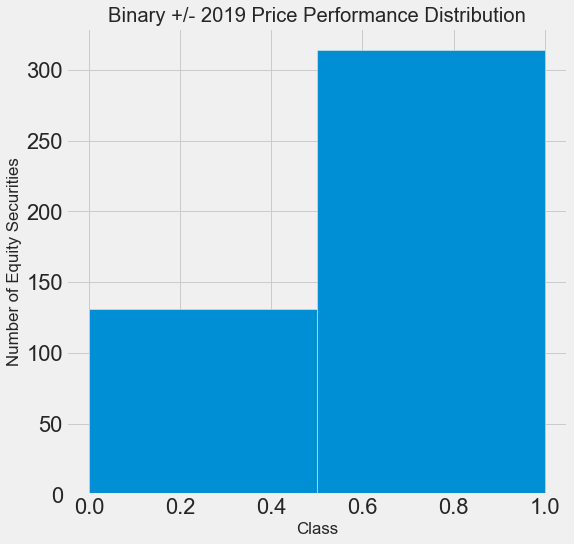

In [35]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['Class'].dropna(), bins = 2);
plt.xlabel('Class'); plt.ylabel('Number of Equity Securities'); 
plt.title('Binary +/- 2019 Price Performance Distribution');
plt.savefig('images\Fig1_NumSec_by_class.png')

In [36]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [37]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [38]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [39]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [40]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

# ML Models

In [41]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [42]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 53.0139


In [43]:
# lr = LinearRegression()
# lr_mae = fit_and_evaluate(lr)

# print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

xgb = XGBRegressor()
xgb_mae = fit_and_evaluate(xgb)

print('XGBoost Regression Performance on the test set: MAE = %0.4f' %xgb_mae)

[20:28:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regression Performance on the test set: MAE = 0.3804


In [44]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.3975


In [45]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

C:\Users\tammy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 0.4005


In [46]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.3817


In [47]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.3539


In [48]:
baseline_guess = np.median(y)
base_mae = mae(y_test, baseline_guess)

print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

Baseline Performance on the test set: MAE = 0.2932


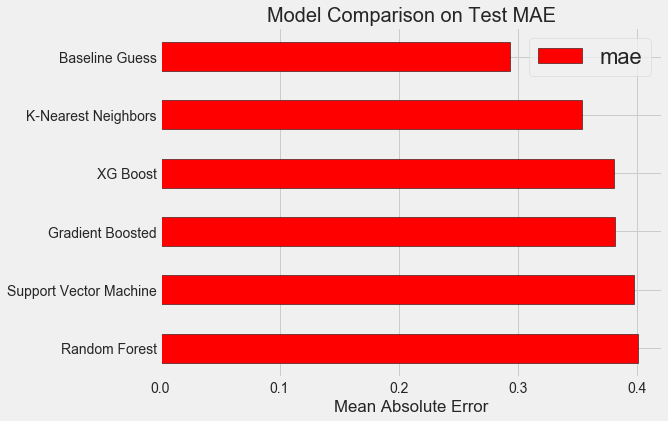

In [49]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['XG Boost', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','Baseline Guess'],
                                 'mae': [xgb_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae, base_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);
plt.savefig('images\Fig2_model_comp.png')

# Model Evaluation

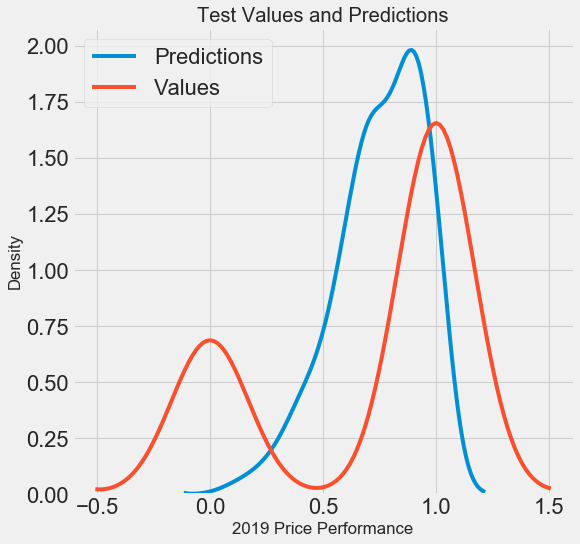

In [50]:
figsize(8, 8)

#KNN prediction
final_pred = knn.predict(X_test)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('2019 Price Performance'); plt.ylabel('Density');
plt.title('Test Values and Predictions');
plt.savefig('images\Fig3_den_vs_price_test_and_pred.png')

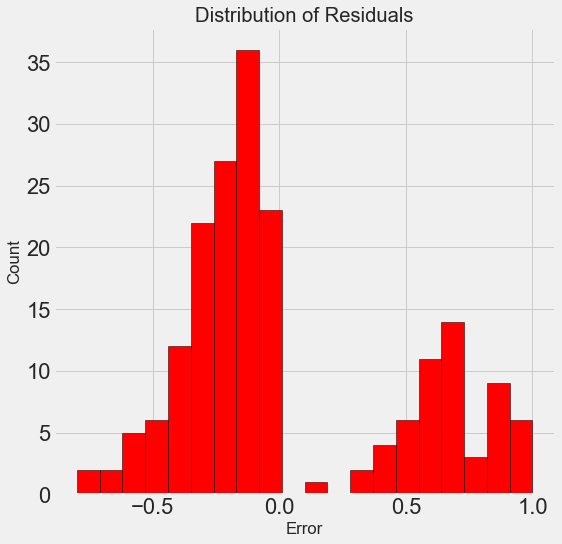

In [51]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');
plt.savefig('images\Fig4_Dist_of_resd.png')